<a href="https://colab.research.google.com/github/xiaolin5167/Github-Colab-Pytorch/blob/main/04_have_fun_with_stablediffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Diffusers
https://huggingface.co/docs/diffusers/installation

**please make sure that you have connected to GPU**

Runtime->change runtime type->choise a gpu

In [1]:
!pip install -q diffusers["torch"] transformers
!pip install -q accelerate
!pip install -q git+https://github.com/huggingface/diffusers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.0/280.0 kB 18.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


#1.text-image
https://huggingface.co/digiplay/majicMIX_realistic_v6

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

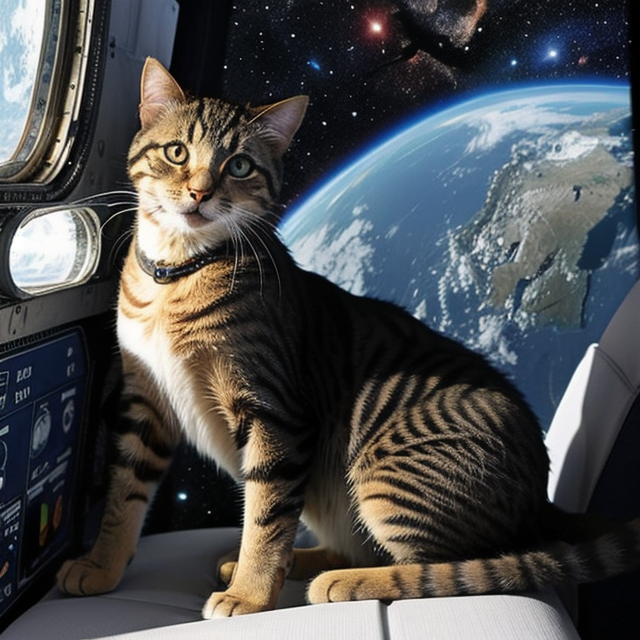

In [26]:
import torch
from diffusers import StableDiffusionPipeline

pipe = StableDiffusionPipeline.from_pretrained("digiplay/majicMIX_realistic_v6", torch_dtype=torch.float16)
pipe = pipe.to("cuda")

prompt = "a cat in space"
h = 640
w = 640
steps = 50
negs = "bad anatomy, bad hands, three ears，three hands, three legs, bad arms, missing legs, missing arms, poorly drawn face, bad face, fused face, cloned face, worst face, three crus, extra crus, fused crus, worst feet, three feet, fused feet, fused thigh, three thigh, fused thigh, extra thigh, worst thigh, missing fingers, extra fingers, ugly fingers, long fingers, horn, realistic photo, extra eyes, huge eyes, 2girl, amputation, disconnected limbs"

image = pipe(prompt, height=h, width=w, num_inference_steps = steps, negative_prompt = negs).images[0]
image

model_index.json:   0%|          | 0.00/671 [00:00<?, ?B/s]

Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

text_encoder/config.json:   0%|          | 0.00/560 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/558 [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/588 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/705 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/856 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.77k [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/462 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/602 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

tokenizer_2/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

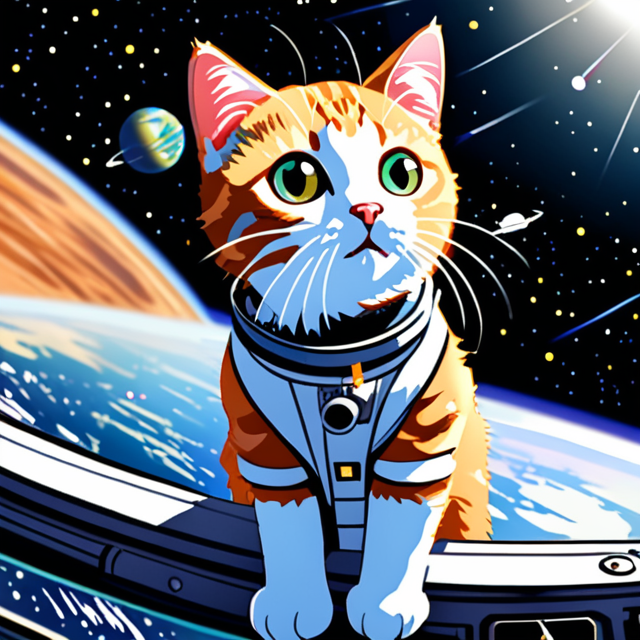

In [3]:
from diffusers import AutoPipelineForText2Image, EulerAncestralDiscreteScheduler
import torch

pipe = AutoPipelineForText2Image.from_pretrained('Lykon/AAM_XL_AnimeMix_Turbo', torch_dtype=torch.float16, variant="fp16")
pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to("cuda")

prompt = "a cat in space"
h = 640
w = 640
steps = 50
negs = "bad anatomy, bad hands, three hands, three legs, bad arms, missing legs, missing arms, poorly drawn face, bad face, fused face, cloned face, worst face, three crus, extra crus, fused crus, worst feet, three feet, fused feet, fused thigh, three thigh, fused thigh, extra thigh, worst thigh, missing fingers, extra fingers, ugly fingers, long fingers, horn, realistic photo, extra eyes, huge eyes, 2girl, amputation, disconnected limbs"

image = pipe(prompt, height=h, width=w, num_inference_steps = steps, negative_prompt = negs).images[0]
image